In [366]:

import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

#Data Retrieving
import yfinance as yf
from bcb import sgs 

In [367]:
btg = yf.Ticker("BPAC11.SA")
btg.info


{'address1': 'Av. Brigadeiro Faria Lima, 3.477',
 'address2': '14th Floor PAtio Victor Malzoni - Itaim Bibi',
 'city': 'São Paulo',
 'state': 'SP',
 'zip': '04538-133',
 'country': 'Brazil',
 'phone': '55 11 3383 2000',
 'website': 'https://www.btgpactual.com.br',
 'industry': 'Capital Markets',
 'industryDisp': 'Capital Markets',
 'sector': 'Financial Services',
 'longBusinessSummary': "Banco BTG Pactual S.A. provides financial products and services in Brazil and internationally. Its investment banking services include advisory services relating to mergers and acquisitions, divestitures, restructurings, spin-offs, reorganizations, and other corporate transactions; placement and advisory services in primary and/ or secondary public offerings; structuring and distribution of fixed income instruments; and financial advisory, issuance coordination, and specific financing structures for energy and infrastructure projects. The company's wealth management products and services comprise tradi

In [368]:
bpca = yf.download("BPAC11.SA",
                    interval="1wk",
                    prepost=False,
                    start= dt.datetime.now() - dt.timedelta(days=365*4),
                    end = dt.datetime.now(),
                    repair=True)

bpca.rename(columns={bpca.columns[0]:"Date"})
bpca.reset_index()
bpca.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Repaired?'], dtype='object')

In [369]:
bpca.head()

,Open,High,Low,Close,Adj Close,Volume,Repaired?
Date,,,,,,,
2019-06-17,12.0000,12.6825,11.8400,12.5875,11.635597,39813200,False
2019-06-24,12.5025,12.7200,12.0550,12.7200,11.758079,71281600,False
2019-07-01,12.9500,14.2200,12.2775,14.0275,12.966701,34978000,False
2019-07-08,13.9650,14.7925,13.9025,14.4975,13.401158,41909600,False
2019-07-15,14.5000,14.7500,14.1400,14.3050,13.223217,36776800,False


<Axes: >

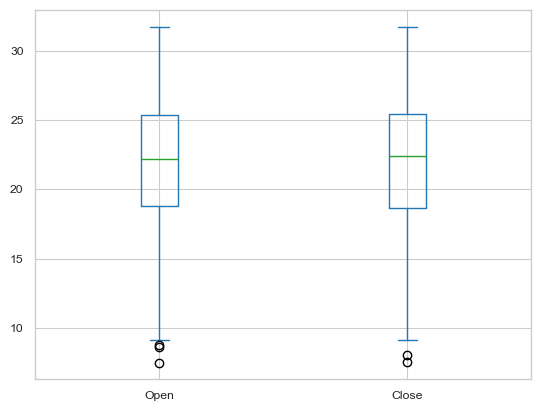

In [370]:
metrics = bpca[['Open',  'Close']].reset_index()
metrics.plot.box()

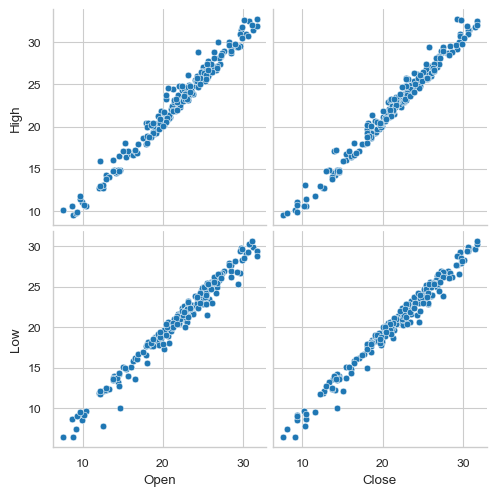

In [371]:
to_observe = bpca[["Open", "High", "Low", "Close"]]
sns.pairplot(
        data=to_observe, 
        x_vars=["Open", "Close"], 
        y_vars=["High", "Low"], 
        diag_kind='hist', 
        diag_kws=dict(fill=False)
                )
plt.show()

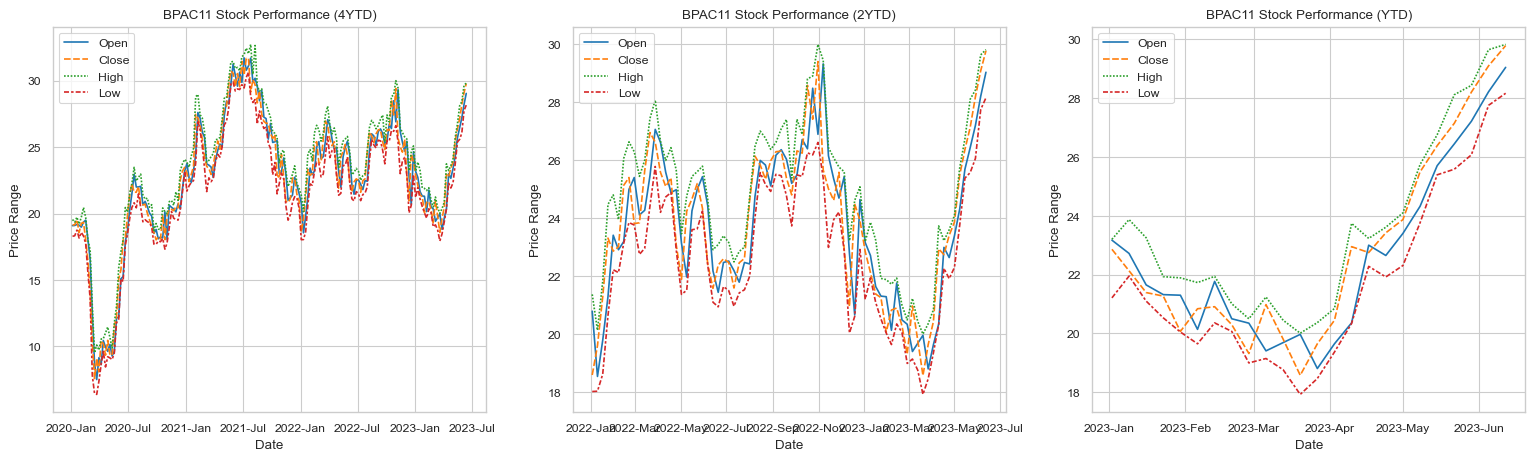

<Figure size 640x480 with 0 Axes>

In [415]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(19,5))

sns.set_style('whitegrid')
sns.set_context('paper')

# AXIS 1 
range_1 = bpca.query("Date >= '2020-01-01'")
range_1_data = range_1[["Open", "Close", "High", "Low"]]

sns.lineplot(range_1_data, ax=ax0)

ax0.set(ylabel="Price Range",
        title=f"BPAC11 Stock Performance (4YTD)")

ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 2
range_2 = bpca.query("Date >= '2022-01-01'")
range_2_data = range_2[["Open", "Close", "High", "Low"]]

sns.lineplot(range_2_data, ax=ax1)

ax1.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (2YTD)")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 3

range_3 = bpca.query("Date > '2023-01-01'")
range_3_data = range_3[["Open", "Close", "High", "Low"]]

sns.lineplot(range_3_data, ax=ax2)

ax2.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (YTD)")

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.show()
plt.clf()


# Macroeconomic Analysis

Getting a grasp of macroeconomicla trends

In [384]:
selic = sgs.get({'selic':432}, start='2015-01-01').reset_index()

selic.head()

,Date,selic
0,2015-01-01,11.75
1,2015-01-02,11.75
2,2015-01-03,11.75
3,2015-01-04,11.75
4,2015-01-05,11.75


In [385]:
selic = selic.rename(columns={'Date':'date', 'selic':'interest_rate'})

selic['interest_rate'].describe()

count    3090.000000
mean        9.068366
std         4.298659
min         2.000000
25%         6.000000
50%         8.250000
75%        13.750000
max        14.250000
Name: interest_rate, dtype: float64

<Axes: >

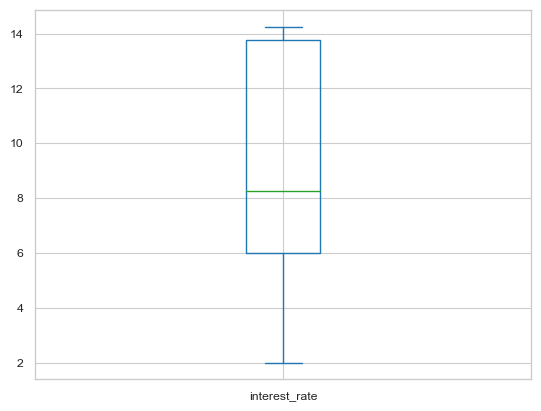

In [419]:
selic.plot.box()

In [386]:
inflation = sgs.get({'ipca':433, 'igpm':189}, start='2015-01-01').reset_index()

inflation.head()

,Date,ipca,igpm
0,2015-01-01,1.24,0.76
1,2015-02-01,1.22,0.27
2,2015-03-01,1.32,0.98
3,2015-04-01,0.71,1.17
4,2015-05-01,0.74,0.41


In [393]:
inflation.describe()

,Date,ipca,igpm
count,101,101.000000,101.000000
mean,2019-03-02 06:53:27.920792064,0.492970,0.707822
min,2015-01-01 00:00:00,-0.680000,-1.840000
25%,2017-02-01 00:00:00,0.230000,0.150000
50%,2019-03-01 00:00:00,0.440000,0.590000
75%,2021-04-01 00:00:00,0.790000,1.170000
max,2023-05-01 00:00:00,1.620000,4.340000
std,NaN,0.429529,1.076325


<Axes: >

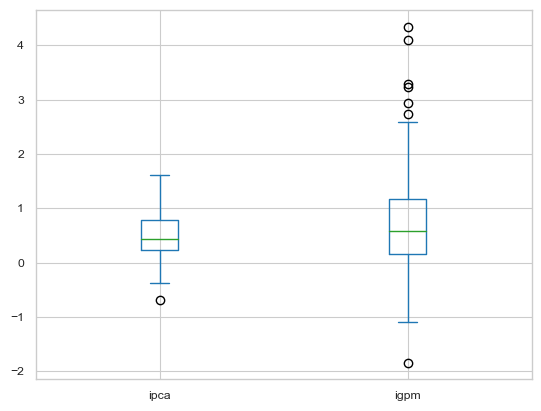

In [413]:
inflation.plot.box()

In [401]:
corr = round(inflation['ipca'].corr(inflation['igpm']), 2)
print(f"IGPM and IPCA have a correlation of {corr}")

IGPM and IPCA have a correlation of 0.38


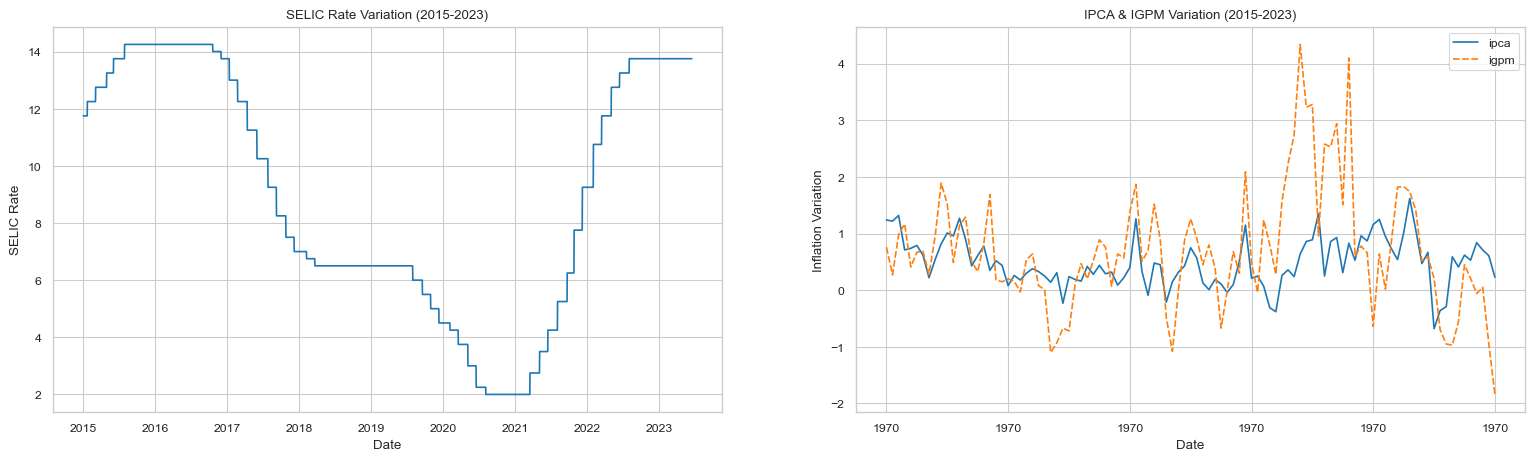

In [418]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(19,5))
sns.set_style('whitegrid')

sns.lineplot(data=selic, x='date', y='interest_rate', ax=ax0)

ax0.set(title="SELIC Rate Variation (2015-2023)",
        ylabel='SELIC Rate',
        xlabel='Date')

inflation_data = inflation.query("Date > '2015-01-01'")
sns.lineplot(data=inflation, ax=ax1)

ax1.set(title="IPCA & IGPM Variation (2015-2023)",
        ylabel='Inflation Variation',
        xlabel='Date')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## BTG & Macro environment

Assessing how sensible are BTG stocks to the macro environment

In [423]:
#Organizing the data

nan